# MLG: Lab 5 (Part 2)

## Exercise 3: Self-organized representation of a collection of images

### Dataset information

The Wang image database is a database of images grouped by class. In this dataset, we downloaded only the 1000 images. You can download them on this website: http://wang.ist.psu.edu/docs/home.shtml more precisely at this address: http://wang.ist.psu.edu/~jwang/test1.tar

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- etc...

All the images in this dataset are 250x166 pixels or 166x250 pixels.

In [1]:
import numpy as np
import matplotlib.pylab as pl
import KohonenUtils
import WangImageUtilities
%matplotlib inline

# Disable warning
import warnings
warnings.filterwarnings('ignore')

In [2]:
extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')
# Here we load images from 300-399 and from 500-599
extractor.load_images(list_indices=list(np.arange(300, 400)) + list(np.arange(500, 600)))

200 images loaded!


### Dataset Visualization

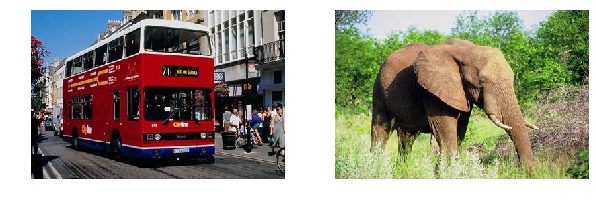

In [3]:
pl.figure(figsize=(10, 20))
pl.subplot(121)
pl.imshow(extractor.images[2])
pl.axis('off')
pl.subplot(122)
pl.imshow(extractor.images[101])
_ = pl.axis('off')

### Clustering with SOM

In [4]:
method = 3
if method == 1:
    histograms = extractor.extract_histogram()
elif method == 2:
    histograms = extractor.extract_hue_histogram()
elif method == 3:
    histograms = extractor.extract_color_histogram()
else:
    print('Implement your own method for extracting features if you like!')

In [5]:
kmap = KohonenUtils.KohonenMap(side_rows=8,
                               side_cols=8,
                               size_vector=histograms.shape[1])

n_iter = 5
learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

names = []
for index in extractor.image_indices:
    names.append(str(index))

kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

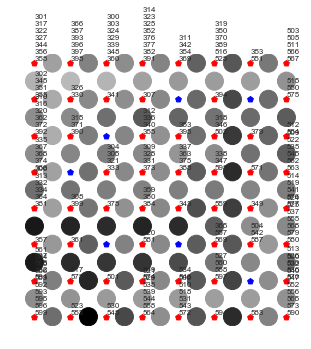

In [6]:
kmap.plot_umatrix(plot_empty=True, plot_names=True)

To simplify analysis, we can write the images to HTML. This is easier to see and analyze.

In [7]:
# Writes a 'som.html' file
# You can visualize the results and click on a neuron to see other images assigned to this neuron
extractor.to_html('som.html', kmap)

<h3>REPORT (date of submission: 27.5 before 23:55)</h3>

1. Explain the three different methods we provided for extracting features. What do you understand about them (input, output), how do they work ?</p>

2. Try the SOM with several (minimum 3) different sets of images (always 100 images per class and at least two classes). You can change the size of the Self-Organizing Map as well as its parameters. 
<ul>
<li> Note that we provided three methods for extracting features: for at least one of the test you do try with all three methods and compare the results. 
<li> Include for each experiment an U-Matrix (with images - print screen of html)) that you find interesting. Explain why you find it interesting (what are the input images, with which features you trained your Self-Organizing Map, with which parameters, and how it is reflected in the results)...
</ul>
</p>

#### 1: TODO

#### 2: 3 expériences

For each class we have 100 corresponding images:
- 0-100: Africans
- 100-200: Beaches
- 200-300: Monuments
- 300-400: Bus
- 400-500: Dino
- 500-600: Elephant
- 600-700: Flowers
- 700-800: Horses
- 800-900: Mountains
- 900-1000: Food

#### Utils

In [19]:
def get_extractor(start1, end1, start2, end2):
    extractor = WangImageUtilities.ImageFeatureExtractor('Wang_Data')

    # Here we load images in the interval [start1, end1[ and [start2, end2[
    extractor.load_images(list_indices=list(np.arange(start1, end1)) + list(np.arange(start2, end2)))
    
    return extractor
    

def get_histograms(histo_type, extractor):
    switcher = {
        'basic': extractor.extract_histogram(),
        'hue': extractor.extract_hue_histogram(),
        'color': extractor.extract_color_histogram()
    }
    
    return switcher.get(histo_type, extractor.extract_histogram())

def run_method(experiment_name, extractor, histo_name, nb_iter, rows=8, cols=8):
    histograms = get_histograms(histo_name, extractor)

    kmap = KohonenUtils.KohonenMap(side_rows=rows,
                                   side_cols=cols,
                                   size_vector=histograms.shape[1])

    n_iter = nb_iter
    learning_rate = KohonenUtils.ExponentialTimeseries(1, 0.05, n_iter*histograms.shape[0])
    neighborhood_size = KohonenUtils.ExponentialTimeseries(2./3 * kmap._map.shape[1], 1, n_iter*histograms.shape[0])

    names = []
    for index in extractor.image_indices:
        names.append(str(index))

    kmap.train(histograms, names, n_iter, learning_rate, neighborhood_size)

    print(histo_name + ":")
    kmap.plot_umatrix(plot_empty=True, plot_names=True)

    # Writes a '<experiment_name>_<histo_name>.html' file
    # You can visualize the results and click on a neuron to see other images assigned to this neuron
    extractor.to_html(experiment_name + '_' + histo_name + '.html', kmap)
    

def run_all_methods(experiment_name, start1, end1, start2, end2, n_iter):
    extractor = get_extractor(start1, end1, start2, end2)

    for histo_name in ['basic', 'hue', 'color']:
        run_method(experiment_name, extractor, histo_name, n_iter)
        

##### 2.1 : Beach and Mountains

200 images loaded!
basic:


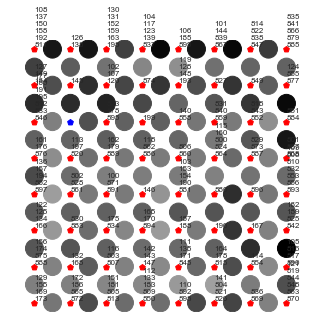

hue:


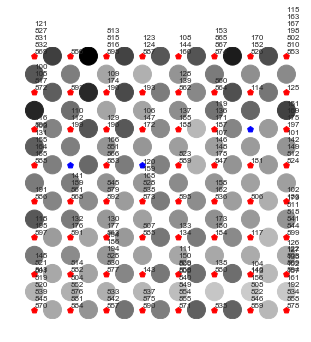

color:


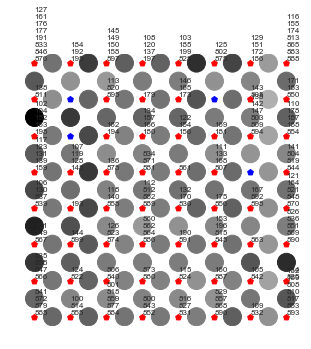

In [28]:
# Image of the beaches (100-199) and mountains (800-899)
run_all_methods('beaches_mountains', 100, 200, 800, 900, 10000)

### TODO: Choose one histogram, test with different rows&columns

##### 2.2 : Dino & Elephant

200 images loaded!
basic:


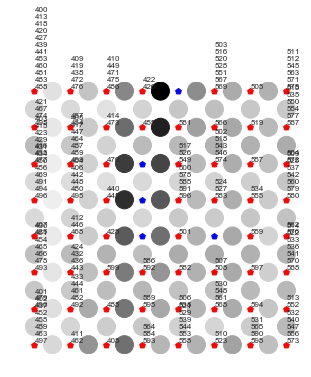

hue:


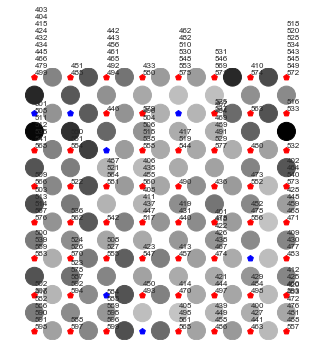

color:


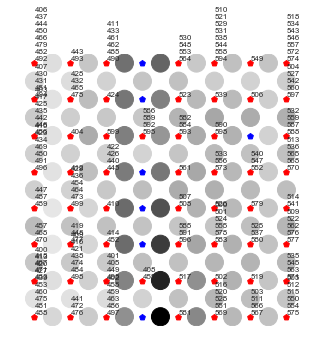

In [29]:
run_all_methods('dino_elephant', 400, 500, 500, 600, 10000)

#### TODO: Choose one histogram, test with different rows&columns

200 images loaded!
color:


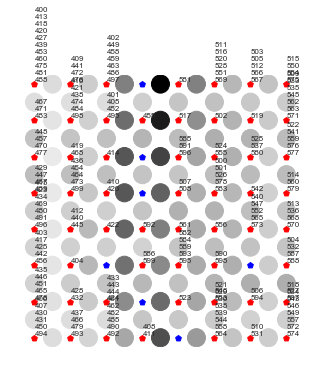

color:


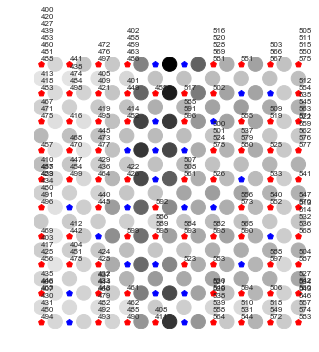

In [22]:
extractor = get_extractor(400, 500, 500, 600)
run_method('dino_elephant', extractor, 'color', 20)

run_method('dino_elephant_big', extractor, 'color', 20, 10, 10)

##### 2.3 : Food & Flower

200 images loaded!
basic:


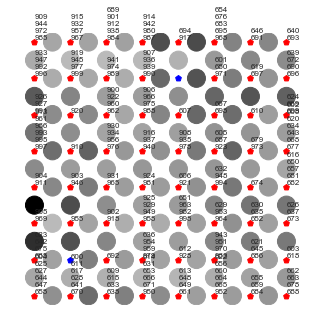

hue:


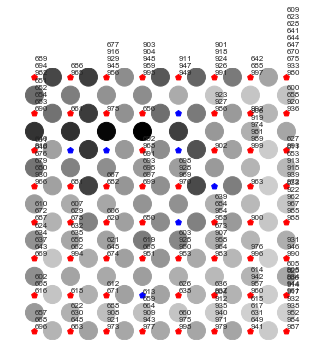

color:


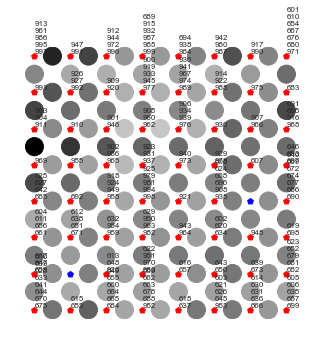

In [30]:
run_all_methods('food_flower', 600, 700, 900, 1000, 10000)